### 3대 지랄견 유기율 데이터 분석
- 가설: 3대 지랄견으로 불리는 코카 스패니얼, 비글, 슈나우저는 유기율이 높을까?

- 사용 라이브러리 로드

In [38]:
from database.Database import Database
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import squarify

In [39]:
db = Database(
    host = "database-2.c3iym8yog7ht.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "pethub",
    password = "addinedu5",
    database = "pethub"
)

In [40]:
sql =   """
        SELECT l.region, p.breed, r.count
        FROM region_pet_regist r
        LEFT JOIN region_list l ON r.region_id = l.id
        LEFT JOIN pet_type p ON r.pet_type_id = p.id;
        """
result = db.selectData(sql)

regist_df = pd.DataFrame(result)
regist_df.columns = ["region", "breed", "pet_count"]
regist_df.head()

,region,breed,pet_count
0,종로구,골든 리트리버,156
1,종로구,그레이 하운드,5
2,종로구,달마시안,3
3,종로구,도베르만,21
4,종로구,라브라도 리트리버,136


In [41]:
sql =   """
        SELECT r.region, t.breed, p.type
        FROM region_pet_abandonment a
        LEFT JOIN region_list r ON a.region_id = r.id
        LEFT JOIN pet_type t ON a.pet_type_id = t.id
        LEFT JOIN pet_abandonment_result p ON a.result_id = p.id;
        """
result = db.selectData(sql)

adbandonment_df = pd.DataFrame(result)
adbandonment_df.columns = ["region", "breed", "type"]
adbandonment_df.head()

,region,breed,type
0,도봉구,한국 고양이,종료 (입양)
1,은평구,한국 고양이,종료 (반환)
2,강서구,믹스견,종료 (입양)
3,강서구,말티즈,종료 (입양)
4,종로구,믹스묘,종료 (입양)


In [42]:
target_breed = ["코카 스파니엘", "비글", "미니어쳐 슈나우저"]

In [43]:
breed_regist_df = regist_df[regist_df["breed"].isin(target_breed)]
breed_regist_df = breed_regist_df.groupby("breed")["pet_count"].sum()
breed_regist_df.head()

breed
미니어쳐 슈나우저    1874
비글           2283
코카 스파니엘      7437
Name: pet_count, dtype: int64

In [44]:
breed_adbandonment_df = adbandonment_df[adbandonment_df["breed"].isin(target_breed)]
breed_adbandonment_df = breed_adbandonment_df.groupby("breed")["type"].count()
breed_adbandonment_df.head()

breed
미니어쳐 슈나우저     1
비글            7
코카 스파니엘      10
Name: type, dtype: int64

In [45]:
merged_data = pd.DataFrame({
    "등록 수": breed_regist_df,
    "유기 수": breed_adbandonment_df
}).fillna(0)
merged_data["유기율 (%)"] = (merged_data["유기 수"] / merged_data["등록 수"]) * 100

In [46]:
merged_data

,등록 수,유기 수,유기율 (%)
breed,,,
미니어쳐 슈나우저,1874,1,0.053362
비글,2283,7,0.306614
코카 스파니엘,7437,10,0.134463


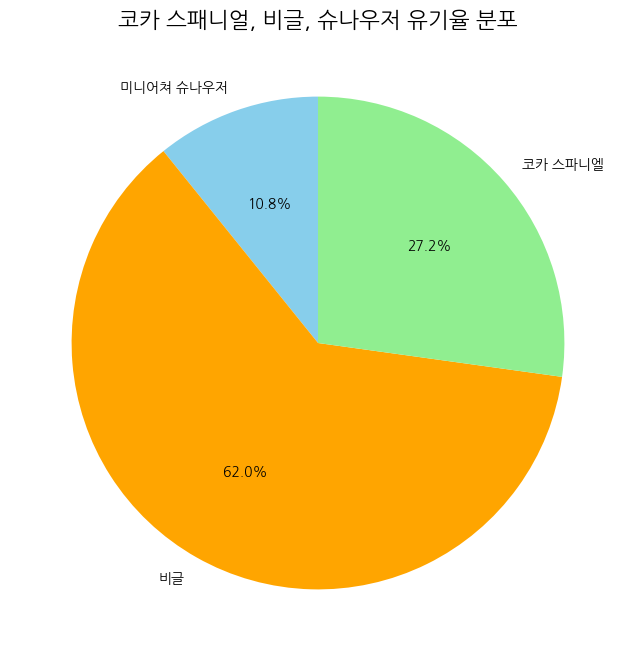

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(
    merged_data["유기율 (%)"],
    labels=merged_data.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["skyblue", "orange", "lightgreen"]
)
plt.title("코카 스패니얼, 비글, 슈나우저 유기율 분포", fontsize=16)
plt.show()

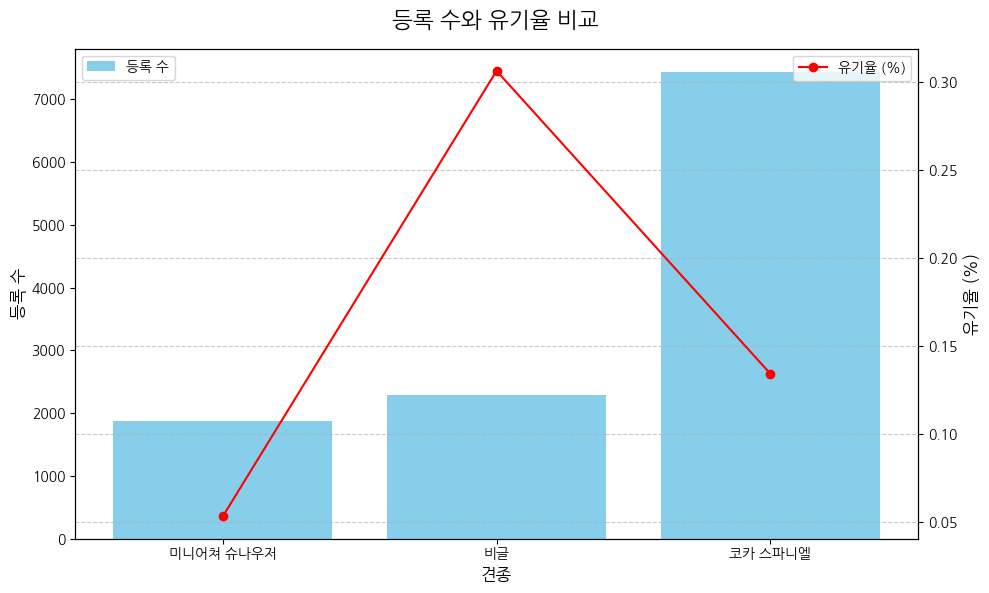

In [48]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프 (등록 수)
ax1.bar(merged_data.index, merged_data["등록 수"], color="skyblue", label="등록 수")
ax1.set_xlabel("견종", fontsize=12)
ax1.set_ylabel("등록 수", fontsize=12)
ax1.tick_params(axis='y')

# 꺾은선 그래프 (유기율)
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data["유기율 (%)"], color="red", marker="o", label="유기율 (%)")
ax2.set_ylabel("유기율 (%)", fontsize=12)
ax2.tick_params(axis='y')

# 제목 및 범례
fig.suptitle("등록 수와 유기율 비교", fontsize=16)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

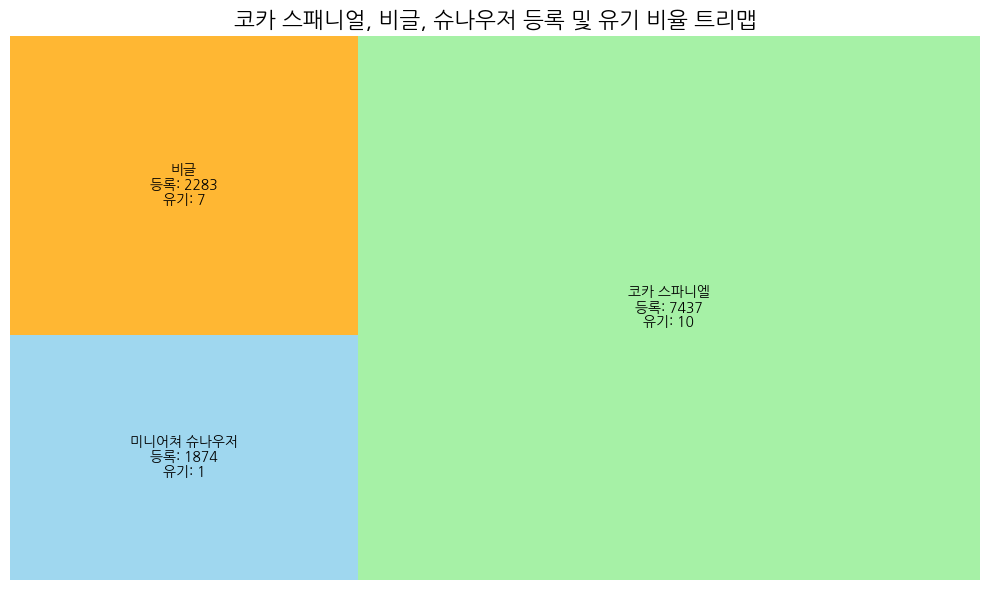

In [49]:
sizes = merged_data["등록 수"].tolist()
labels = [f"{breed}\n등록: {int(reg)}\n유기: {int(abd)}"
          for breed, reg, abd in zip(merged_data.index, merged_data["등록 수"], merged_data["유기 수"])]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=.8, color=["skyblue", "orange", "lightgreen"])
plt.title("코카 스패니얼, 비글, 슈나우저 등록 및 유기 비율 트리맵", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()

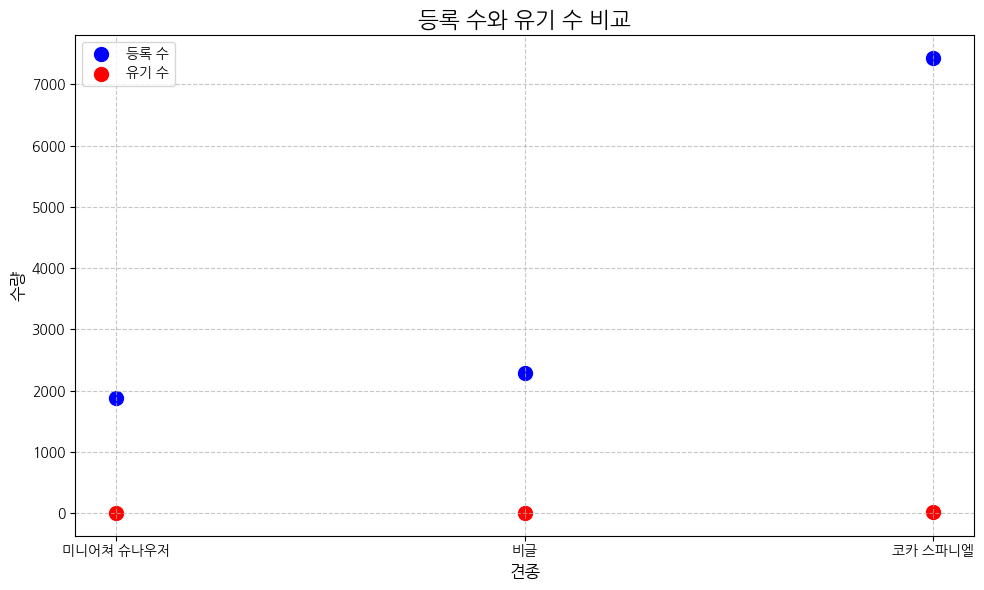

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data.index, merged_data["등록 수"], color="blue", label="등록 수", s=100)
plt.scatter(merged_data.index, merged_data["유기 수"], color="red", label="유기 수", s=100)
plt.title("등록 수와 유기 수 비교", fontsize=16)
plt.xlabel("견종", fontsize=12)
plt.ylabel("수량", fontsize=12)
plt.legend()
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()